资料仅供参考，切勿用于非法用途，请在24小时内学习后删除。<br>
造成任何后果，与up无关！

# 说在前面

因为我这个是 jupyter，比较智能，不需要 print() 就可以输出东西<br>
如果是 pycharm 之类的，需要写 print(xxx) 才能输出东西到

In [1]:
5+5

10

## 分类

·搜索引擎爬虫<br>
·精确爬虫

## robots 协议（君子协议）

Robots协议（也称为爬虫协议、机器人协议等）的全称是“网络爬虫排除标准”，robots.txt是搜索引擎访问网站时第一个查看的文件，当我们网站有部分内容不希望收搜索引擎抓取时，就可以通过Robots协议来告诉搜索引擎哪些页面是不能抓取的，大多用来保护网站的隐私，以及一些死链、重复页面等等。<br>
https://www.zhihu.com<br>
https://www.zhihu.com/robots.txt

## 不要进橘子了

破坏计算机信息系统罪<br>
侵犯公民个人信息罪<br>

所以说，个人信息坚决不要碰（哪怕是只有电话号码，其他什么信息的都没有的）<br>
政府网站一定要慢，有些年久失修的网站很容易爬崩

## 爬虫的本质

所见即所得，不可见不可得<br>
能爬的能爬，不能爬的不能爬；如果不能爬的能爬，那么能爬的都能爬，所以你到底爬不爬

## 推荐课程

### 入门

https://www.bilibili.com/video/BV1i54y1h75W
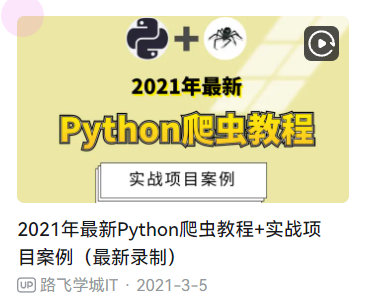

辅以：《Python 3网络爬虫开发实战 》崔庆才著.pdf

### 进阶

Python 3反爬虫原理与绕过实战 by 韦世东 (z-lib.org).pdf<br>
正则指引 by 余晟 (z-lib.org).pdf<br>
js逆向的资源

### 入狱

志远老师 3399 包吃包住 懂的都懂 快来找我吧 [志远B站](https://space.bilibili.com/38940666)

# 开始爬了

## 第〇步：导库

In [2]:
import requests

In [3]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


## 第一步：请求信息

### 请求方法
>请求方法一般有两种，post 请求、get 请求

#### get 请求<br>
https://baike.baidu.com/item/%E6%88%90%E9%83%BD%E4%BF%A1%E6%81%AF%E5%B7%A5%E7%A8%8B%E5%A4%A7%E5%AD%A6%E5%AD%A6%E7%94%9F%E6%95%B0%E5%AD%A6%E5%BB%BA%E6%A8%A1%E5%8D%8F%E4%BC%9A/22470042
> 网页源代码里面看得到（Ctrl+U），每一个操作，网页的网址都会改变（豆瓣）

In [7]:
resp = requests.get("https://baike.baidu.com/item/%E6%88%90%E9%83%BD%E4%BF%A1%E6%81%AF%E5%B7%A5%E7%A8%8B%E5%A4%A7%E5%AD%A6%E5%AD%A6%E7%94%9F%E6%95%B0%E5%AD%A6%E5%BB%BA%E6%A8%A1%E5%8D%8F%E4%BC%9A/22470042")
resp.encoding = "utf-8"  # 更改网页的编码
resp.text

'<!doctype html>\r\n<html lang="en">\r\n<head>\r\n    <meta charset="UTF-8">\r\n    <title>百度百科——全球领先的中文百科全书</title>\r\n    <style>\r\n    p {\r\n        margin: 0;\r\n    }\r\n    .baikeLogo {\r\n        width: 780px;\r\n        height: 50px;\r\n        margin: 150px auto 75px;\r\n        text-indent: -9999em;\r\n        background: url(https://img.baidu.com/img/baike/logo-baike.png) 50% 50% no-repeat;\r\n    }\r\n    /* S-- errorBox */\r\n        .errorBox {\r\n            width: 780px;\r\n            margin: 0 auto 65px;\r\n            text-align: center;\r\n            font-family: "Microsoft yahei";\r\n        }\r\n        .errorBox .timeOut {\r\n            color: #666;\r\n            font-size: 16px;\r\n        }\r\n        .errorBox .timeOut a {\r\n            color: #136ec2;\r\n            text-decoration:none;\r\n        }\r\n        .errorBox .countdown {\r\n            font-weight: 700;\r\n        }\r\n    /* E-- errorBox */\r\n\r\n    /* S-- sorryBox */\r\n        .sorryBo

#### post 请求<br>
http://www.gov.cn/zhuanti/2021yqfkgdzc/index.htm#/
> 浏览器地址栏的 url 不会改变，需要通过抓包获取真实的 url

In [19]:
import time
time.time()

1659277521.9730966

In [65]:
# 这个网站有 sha265 加密

import hashlib
import os
import time
import pandas as pd
import requests
import fake_useragent
import tqdm
import random
import re
import datetime


def get_signatureHeader(timestamp, token="23y0ufFl5YxIyGrI8hWRUZmKkvtSjLQA"):
    timestamp = timestamp
    nonce = "123456789abcdefg"
    data = timestamp + token + nonce + timestamp
    data_sha = hashlib.sha256(data.encode("utf-8")).hexdigest()
    return data_sha


def get_x_wif_signature(timestamp):
    data = timestamp + "fTN2pfuisxTavbTuYVSsNJHetwq5bJvCQkjjtiLM2dCratiA" + timestamp
    data_sha = hashlib.sha256(data.encode("utf-8")).hexdigest()
    return data_sha


def get_data(city_code):
    ti = str(time.time()).split(".")[0]
    js = {
        "appId": "NcApplication",
        "code": city_code,
        "key": "6C3C60DC1BF54982A54D5A8CB4D1817D",
        "nonceHeader": "123456789abcdefg",
        "paasHeader": "zdww",
        "signatureHeader": get_signatureHeader(timestamp=ti).upper(),
        "timestampHeader": ti
    }

    ua = fake_useragent.UserAgent()
    headers = {
        "Accept": "application/json, text/javascript, */*; q=0.01",
        "Accept-Encoding": "gzip, deflate",
        "Accept-Language": "en-GB,en;q=0.9,zh-CN;q=0.8,zh;q=0.7",
        "Cache-Control": "no-cache",
        "Connection": "keep-alive",
        "Content-Length": "251",
        "Content-Type": "application/json; charset=UTF-8",
        "Host": "bmfw.www.gov.cn",
        "Origin": "http://www.gov.cn",
        "Pragma": "no-cache",
        "Referer": "http://www.gov.cn/",
        "User-Agent": ua.random,
        "x-wif-nonce": "QkjjtiLM2dCratiA",
        "x-wif-paasid": "smt-application",
        "x-wif-signature": get_x_wif_signature(timestamp=ti).upper(),
        "x-wif-timestamp": ti
    }

    url = "http://bmfw.www.gov.cn/bjww/interface/interfaceJson"
    resp_json = requests.post(url=url, headers=headers, json=js).json()
    return resp_json


get_data("321300")

{'data': {'levelTag': '6',
  'list': [{'code': '321300',
    'province': '江苏省',
    'city': '宿迁市',
    'county': '',
    'provider': '宿迁市新冠肺炎疫情防控工作领导小组办公室',
    'leave_policy': '非必要不前往中高风险地区和有本土聚集性疫情所在的县（市、区、旗）。如果确实有需要要前往这些地区，要在抵宿前向所在社区（村、单位、酒店）报告，或通过“宿康宝”小程序进行网上申报，并配合做好健康管理措施。',
    'come_policy': '1.密切关注疫情动态，凡是有中高风险地区、本土聚集性疫情所在设区市的来（返）宿人员，提前2天通过“宿康宝”小程序自主申报或向目的地单位、社区（村）或酒店报备，抵宿后积极配合落实相关健康管理措施。\n\n2.对入境人员实行“7天集中隔离医学观察+3天居家健康监测”管理措施。居家健康监测期间不外出，如就医等特殊情况必需外出时做好个人防护，尽量避免乘坐公共交通工具。\n\n3.近7天内有高风险地区旅居史人员，要主动向所在社区（村、酒店、单位等）报备，积极配合做好“7天集中隔离医学观察”，在集中隔离第1、2、3、5、7天各开展一次核酸检测。\n\n4.近7天内有中风险地区旅居史人员，配合做好“7天居家隔离医学观察”，居家隔离医学观察第1、4、7天各开展一次核酸检测；如不具备居家隔离医学观察条件，采取集中隔离医学观察。\n\n5.近7天内有中高风险区所在县（区）低风险区旅居史的人员，需持48小时核酸检测阴性证明。返宿后3天内应完成两次核酸检测（间隔24小时），并做好健康监测。其他低风险区来宿（返）宿人员持绿码可自由流动。\n\n6.对于有疫情地区，高校内如没有疫情、学校实施7天以上封闭管理、持48小时内核酸阴性证明和所在高校开具的相关证明，不再进行集中隔离，到家后实施7天健康监测。\n\n7.有关防控措施将根据疫情形势动态调整，请广大市民继续履行个人防控责任，做好戴口罩、勤洗手、多通风、勤消毒、保持社交距离等防护措施，主动配合落实各项疫情防控措施。',
    'aviation': '',
    'railway': '1.对进站旅客检码测温，检查48小时核酸检测阴性证明；对健康码

>浏览器地址栏的 url 是 get 请求，但通过 F12 抓包的，请求方法并不一定绝对是 post，需要具体去看
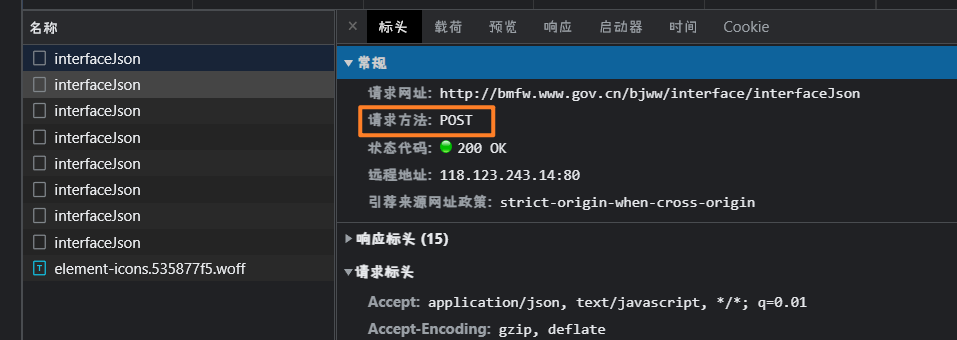

### 请求头 headers

In [8]:
url = "https://baike.baidu.com/item/%E6%88%90%E9%83%BD%E4%BF%A1%E6%81%AF%E5%B7%A5%E7%A8%8B%E5%A4%A7%E5%AD%A6%E5%AD%A6%E7%94%9F%E6%95%B0%E5%AD%A6%E5%BB%BA%E6%A8%A1%E5%8D%8F%E4%BC%9A/22470042"
headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"
}
resp = requests.get(url=url, headers=headers)
resp.encoding = "utf-8"  # 更改网页的编码
resp.text

'<!DOCTYPE html>\n<!--STATUS OK-->\n<html style="">\n\n\n\n<head>\n<meta charset="UTF-8">\n<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\n<meta name="referrer" content="always" />\n<meta name="description" content="成都信息工程大学学生数学建模协会是由成都信息工程大学数学建模和数学爱好者所组成的学生社团。学生数学建模协会正式成立于2001年，是经成都信息工程大学校团委，应用数学学院团委批准，由应用数学学院老师指导，同学自发成立的协会。经过不断地发展，协会已经成为我校规模和影响力最大的学生社团之一。在增长学生知识和提高能力的同时，本协会也为我校培养了大量的全国大学生数学建模竞赛人才，并多次为我校在全国大学生数学建模竞赛中争得荣誉。">\n<title>成都信息工程大学学生数学建模协会_百度百科</title>\n<link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" />\n<link rel="icon" sizes="any" mask href="//baikebcs.bdimg.com/cms/static/baike-icon.svg">\n\n<meta name="csrf-token" content="d4b87f38b35a5e84f28e8674b41132db">\n<meta itemprop="dateUpdate" content="2022-07-01 16:24:28" />\n<meta name="keywords" content="成都信息工程大学学生数学建模协会, 成都信息工程大学学生数学建模协会协会综述, 成都信息工程大学学生数学建模协会数学建模竞赛, 成都信息工程大学学生数学建模协会航空港校区协会介绍, 成都信息工程大学学生数学建模协会龙泉校区协会介绍, 成都信息工程大学学生数学建模协会附录, 成都信息工程大学学生数学建模协会协会章程, 成都信息工程大学学生数学建模协会协会的核心技术——数学建模">\n<link r

请求头里面的并不是 copy 了就稳了，很有可能有加密的参数，比如说上面那个疫情防控的有 sha265 加密

### 其他参数

#### params  参数<br>
https://cn.bing.com/search?q=python

In [21]:
url = "https://cn.bing.com/search?q=python"
resp = requests.get(url=url, headers=headers)
# resp.text
resp.url

'https://cn.bing.com/search?q=python'

In [23]:
url = "https://cn.bing.com/search"
params = {
    "q": "python"
}
resp = requests.get(url=url, headers=headers, params=params)
# resp.text
resp.url

'https://cn.bing.com/search?q=python'

#### post 请求的 json 参数
>requests.post(url, headers, pararms, json)

我们都知道，post 请求通常是需要提交数据给服务器的，这个时候，我们就可以这个样子（那个防疫政策的栗子）

## 第二步：提取数据

### resp.text

提取数据有很多库，比如说<br>
bs4（库名叫 beautifulsoup4，熟称 美丽汤）<br>
etree<br>
re（著名的正则表达式）<br>
这个地方就不讲了，建议去开头说的B站康康，正则表达式是最强的，正则yyds

### resp.json  如果有

In [25]:
resp_json = '{"errorCode":0,"errorMsg":"","hasMore":true,"offset":"1651707295.141546","pageItems":[{"info":{"itemId":"100_36326333","type":100,"jumpUrl":"https://news.10jqka.com.cn/tapp/notice.html#seq=36326333","webrsid":"ann_36326333"},"combination":[{"topicLine":{"topic":{"url":"https://basic.10jqka.com.cn/basicph/event.html?code=000004","name":"公司公告","topicWebrsid":"ann_topic","iconInfo":{"urlForDay":"https://u.thsi.cn/imgsrc/flashcms/322848080_0be2d48c31f4952176d8410d53332b09.png","urlForNight":"https://u.thsi.cn/imgsrc/flashcms/322848080_b05c3c8cda16771379d300065b9ce029.png"}}}},{"title":{"content":"ST国华：股票交易异常波动公告"}},{"bottomBar":{"recommend":"","recommendType":0,"source":"深交所股票","time":1652803396000,"clicks":-1}}]},{"info":{"itemId":"100_36370919","type":100,"jumpUrl":"https://news.10jqka.com.cn/tapp/notice.html#seq=36370919","webrsid":"ann_36370919"},"combination":[{"topicLine":{"topic":{"url":"https://basic.10jqka.com.cn/basicph/event.html?code=000004","name":"公司公告","topicWebrsid":"ann_topic","iconInfo":{"urlForDay":"https://u.thsi.cn/imgsrc/flashcms/322848080_0be2d48c31f4952176d8410d53332b09.png","urlForNight":"https://u.thsi.cn/imgsrc/flashcms/322848080_b05c3c8cda16771379d300065b9ce029.png"}}}},{"title":{"content":"国华网安:关于对深圳国华网安科技股份有限公司2021年年报问询函的回复"}},{"bottomBar":{"recommend":"","recommendType":0,"source":"深交所","time":1652803200000,"clicks":-1}}]},{"info":{"itemId":"1_639165834","type":1,"jumpUrl":"https://news.10jqka.com.cn/m639165834/","webrsid":"seq_639165834"},"combination":[{"title":{"content":"【龙虎榜】 ST国华 05月17日成交明细"}},{"bottomBar":{"recommend":"","recommendType":0,"source":"同花顺资讯中心","time":1652775783000,"clicks":1360}}]},{"info":{"itemId":"1_639135965","type":1,"jumpUrl":"https://news.10jqka.com.cn/m639135965/","webrsid":"seq_639135965"},"combination":[{"title":{"content":"ST国华05月16日主力资金大幅流入"}},{"bottomBar":{"recommend":"","recommendType":0,"source":"同花顺AI资讯社","time":1652687548000,"clicks":1583}}]}]}'
print(resp_json)
print(type(resp_json))

{"errorCode":0,"errorMsg":"","hasMore":true,"offset":"1651707295.141546","pageItems":[{"info":{"itemId":"100_36326333","type":100,"jumpUrl":"https://news.10jqka.com.cn/tapp/notice.html#seq=36326333","webrsid":"ann_36326333"},"combination":[{"topicLine":{"topic":{"url":"https://basic.10jqka.com.cn/basicph/event.html?code=000004","name":"公司公告","topicWebrsid":"ann_topic","iconInfo":{"urlForDay":"https://u.thsi.cn/imgsrc/flashcms/322848080_0be2d48c31f4952176d8410d53332b09.png","urlForNight":"https://u.thsi.cn/imgsrc/flashcms/322848080_b05c3c8cda16771379d300065b9ce029.png"}}}},{"title":{"content":"ST国华：股票交易异常波动公告"}},{"bottomBar":{"recommend":"","recommendType":0,"source":"深交所股票","time":1652803396000,"clicks":-1}}]},{"info":{"itemId":"100_36370919","type":100,"jumpUrl":"https://news.10jqka.com.cn/tapp/notice.html#seq=36370919","webrsid":"ann_36370919"},"combination":[{"topicLine":{"topic":{"url":"https://basic.10jqka.com.cn/basicph/event.html?code=000004","name":"公司公告","topicWebrsid":"ann_to

In [26]:
import json

resp_json = json.loads(resp_json)  # 只有对字符串需要这样转换为 json 格式，如果是 resp.json，那么拿到的就是 json串
print(resp_json)
print(type(resp_json))

{'errorCode': 0, 'errorMsg': '', 'hasMore': True, 'offset': '1651707295.141546', 'pageItems': [{'info': {'itemId': '100_36326333', 'type': 100, 'jumpUrl': 'https://news.10jqka.com.cn/tapp/notice.html#seq=36326333', 'webrsid': 'ann_36326333'}, 'combination': [{'topicLine': {'topic': {'url': 'https://basic.10jqka.com.cn/basicph/event.html?code=000004', 'name': '公司公告', 'topicWebrsid': 'ann_topic', 'iconInfo': {'urlForDay': 'https://u.thsi.cn/imgsrc/flashcms/322848080_0be2d48c31f4952176d8410d53332b09.png', 'urlForNight': 'https://u.thsi.cn/imgsrc/flashcms/322848080_b05c3c8cda16771379d300065b9ce029.png'}}}}, {'title': {'content': 'ST国华：股票交易异常波动公告'}}, {'bottomBar': {'recommend': '', 'recommendType': 0, 'source': '深交所股票', 'time': 1652803396000, 'clicks': -1}}]}, {'info': {'itemId': '100_36370919', 'type': 100, 'jumpUrl': 'https://news.10jqka.com.cn/tapp/notice.html#seq=36370919', 'webrsid': 'ann_36370919'}, 'combination': [{'topicLine': {'topic': {'url': 'https://basic.10jqka.com.cn/basicph/e

In [36]:
li = []
for i in resp_json["pageItems"]:
    li.append(i["info"]["jumpUrl"])
li

['https://news.10jqka.com.cn/tapp/notice.html#seq=36326333',
 'https://news.10jqka.com.cn/tapp/notice.html#seq=36370919',
 'https://news.10jqka.com.cn/m639165834/',
 'https://news.10jqka.com.cn/m639135965/']

### resp.content

>是在爬图片、视频、压缩包等文件时用<br>
后面会举例子的

## 第三步：保存数据

### 文本数据

推荐使用 csv 储存
>逗号分隔值（Comma-Separated Values，CSV，有时也称为字符分隔值，因为分隔字符也可以不是逗号），其文件以纯文本形式存储表格数据（数字和文本）。纯文本意味着该文件是一个字符序列，不含必须像二进制数字那样被解读的数据。CSV文件由任意数目的记录组成，记录间以某种换行符分隔；每条记录由字段组成，字段间的分隔符是其它字符或字符串，最常见的是逗号或制表符。

In [37]:
# 导库
import csv

#### 写入数据的第一种方法 open

In [5]:
file = open(r"E:\JupyterNotebook\接单单\武侯区\data.csv", encoding="utf-8")
data = file.read()
# data

>open() 函数的参数<br>
>open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)

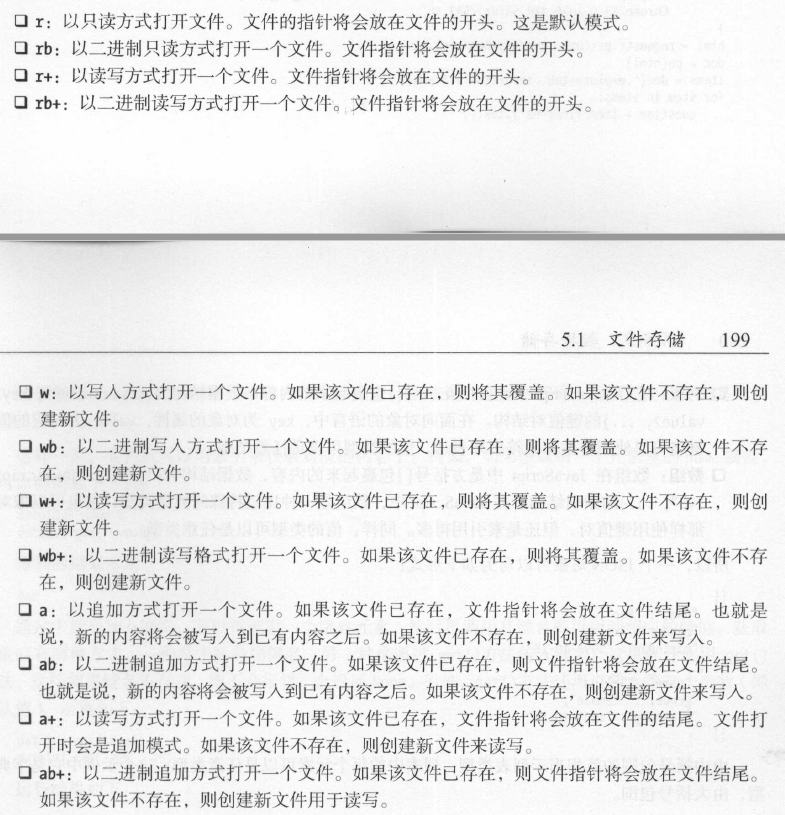

其实就关注：<br>
r：读<br>
w：写<br>
a：追加<br>
rb、wb、ab：二进制（在图片、视频、文件才会用到）

In [41]:
data_list = [1, 2, 3, 4]
data_lists = [
    [7, 8, 9, 10], 
    [11, 18, 0, 0]
             ]

In [43]:
f = open("data1.csv", encoding="utf-8", mode="w", newline="")
dataWriter = csv.writer(f)
dataWriter.writerow(data_list)
dataWriter.writerows(data_lists)
f.close()

#### 写入数据的第二种方法 with open

In [46]:
with open("data2.csv", encoding="utf-8", mode="w", newline="") as f:
    dataWriter1 = csv.writer(f)
    dataWriter1.writerows(data_lists)
    dataWriter1.writerow(data_list)

#### 视频或者图片或者压缩包<br>
http://www.rsscc.cn/index.html#first

In [4]:
resp = requests.get("https://cdn.133.cn/ticket/web/official-website/video/index-header.mp4")
resp_content = resp.content  # 二进制数据
# resp_content

In [48]:
with open("装逼的视频.mp4", mode="wb") as f:
    f.write(resp_content)

# 反爬之一：需要登录

## 方法一：session 使用会话

In [4]:
session = requests.Session()

resp = session.post(url="https://www.bilibli.com/login", json={"zhanghao":"00", "pwd":"00"})

resp = session.get()
resp.json

session.get()

## 方法二：携带表明你身份的东西：例如cookie

下面这个案例就是介个方法

# 手搓一个爬虫

## 第一只爬虫

In [3]:
import pandas as pd
import tqdm
import time
from concurrent import futures
import random


def get_data(air, da_start, da_end):
    params = {
        "airport": air,
        "route_type": "all",
        "start_time": da_start,
        "end_time": da_end
    }
    headers = {
        "Authorization": 填你自己的,
        "Origin": "https://dast.133.cn",
        "Referer": "https://dast.133.cn/",
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36",
        "client-id": 填你自己的,
        "Content-Type": "application/x-www-form-urlencoded",
        "sec-ch-ua-mobile": "?0",
        "sec-ch-ua-platform": "Windows",
        "Sec-Fetch-Dest": "empty",
        "Sec-Fetch-Mode": "cors",
        "Sec-Fetch-Site": "same-site"
    }
    url = " https://data-api.133.cn/api/v1/airport/statistics"
    resp = requests.get(url=url, params=params, headers=headers)
    resp_json = resp.json()
    
    arr_plan = resp_json["data"]["fluctuation"]["arr_plan"]  # 计划进港
    arr_real = resp_json["data"]["fluctuation"]["arr_real"]  # 实际进港
    dep_plan = resp_json["data"]["fluctuation"]["dep_plan"]  # 计划出港
    dep_real = resp_json["data"]["fluctuation"]["dep_real"]  # 实际出港
    
    data_list = arr_plan + arr_real + dep_plan + dep_real
    return data_list


def main(da):
    data = get_data("PEK", da_start=da, da_end=da)
    dataWriter.writerow([da] + data)


if __name__ == '__main__':
    with open("CTU_data_twoYears.csv", mode="a", encoding="utf-8", newline="") as f:
        dataWriter = csv.writer(f)

        for date in tqdm.tqdm(pd.date_range("2020-06-25", "2022-07-27")):
            date_str = str(date.date())
            main(date_str)
            time.sleep(random.random() + 2)

  0%|▎                                                                                                                      | 2/763 [00:08<53:58,  4.26s/it]


KeyboardInterrupt: 

## 飞起来爬

In [ ]:
import pandas as pd
import tqdm
import time
from concurrent import futures
import random


def get_data(air, da_start, da_end):
    params = {
        "airport": air,
        "route_type": "all",
        "start_time": da_start,
        "end_time": da_end
    }
    headers = {
        "Authorization": 填你自己的,
        "Origin": "https://dast.133.cn",
        "Referer": "https://dast.133.cn/",
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36",
        "client-id": 填你自己的,
        "Content-Type": "application/x-www-form-urlencoded",
        "sec-ch-ua-mobile": "?0",
        "sec-ch-ua-platform": "Windows",
        "Sec-Fetch-Dest": "empty",
        "Sec-Fetch-Mode": "cors",
        "Sec-Fetch-Site": "same-site"
    }
    url = " https://data-api.133.cn/api/v1/airport/statistics"
    resp = requests.get(url=url, params=params, headers=headers)
    resp_json = resp.json()
    
    arr_plan = resp_json["data"]["fluctuation"]["arr_plan"]  # 计划进港
    arr_real = resp_json["data"]["fluctuation"]["arr_real"]  # 实际进港
    dep_plan = resp_json["data"]["fluctuation"]["dep_plan"]  # 计划出港
    dep_real = resp_json["data"]["fluctuation"]["dep_real"]  # 实际出港
    
    data_list = arr_plan + arr_real + dep_plan + dep_real
    return data_list


def main(da):
    data = get_data("PEK", da_start=da, da_end=da)
    dataWriter.writerow([da] + data)


if __name__ == '__main__':
    with open("CTU_data_twoYears.csv", mode="a", encoding="utf-8", newline="") as f:
        dataWriter = csv.writer(f)
            
        tasks = []
        with futures.ThreadPoolExecutor(20) as t:
            for date in pd.date_range("2020-01-01", "2022-07-27"):
                tasks.append(t.submit(main, date))
            print("爬")
            for task in tqdm.tqdm(futures.as_completed(tasks), total=len(tasks)):
                task.result()

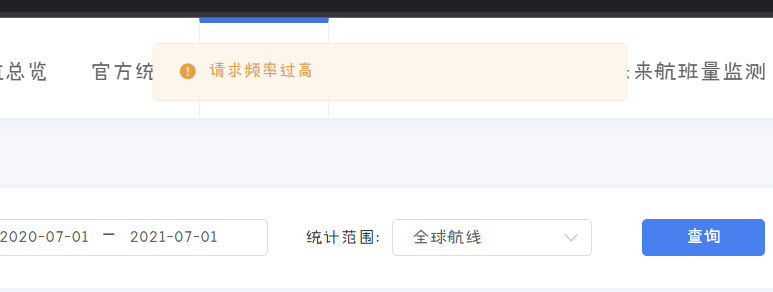

反反爬方法一：买账号<br>
反反爬方法二：买代理 ip（hui产）<br>
反反爬方法三：selenium解君愁

# app 爬虫

>模拟器：一定要 mumu 模拟器的 安卓6，如果安装不起64位的可以安装32位<br>
>抓包软件：fiddler charles mitm

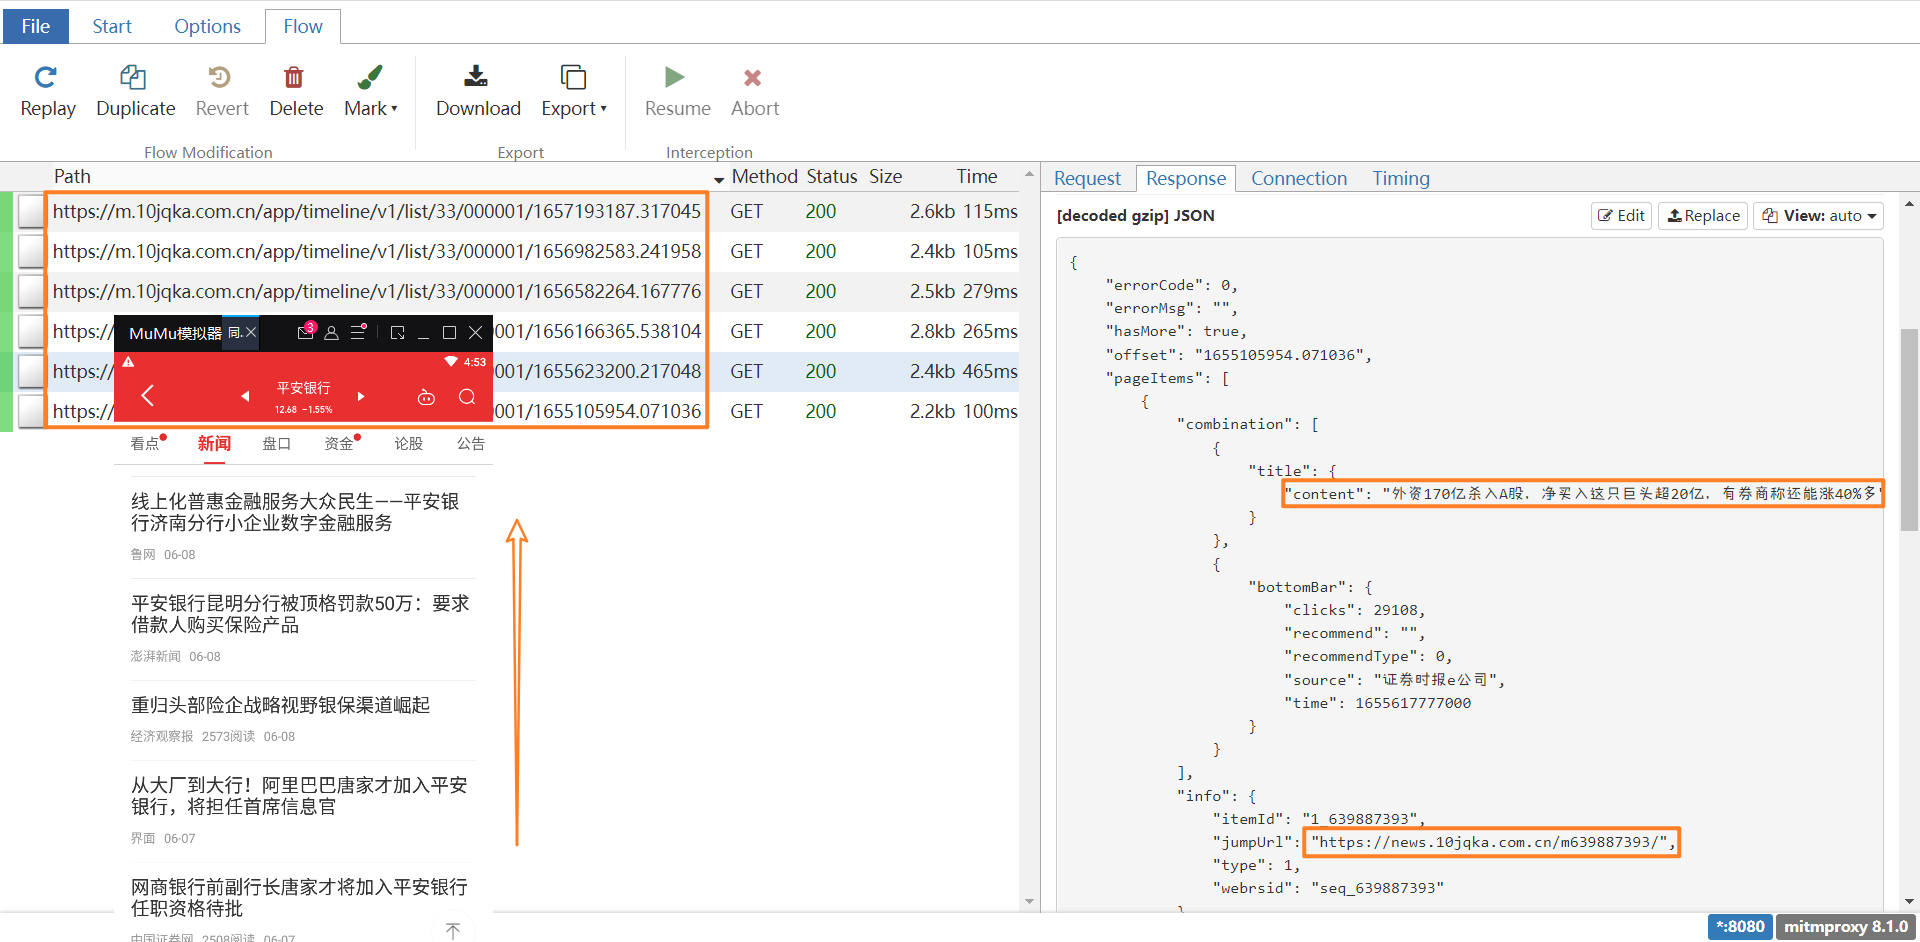

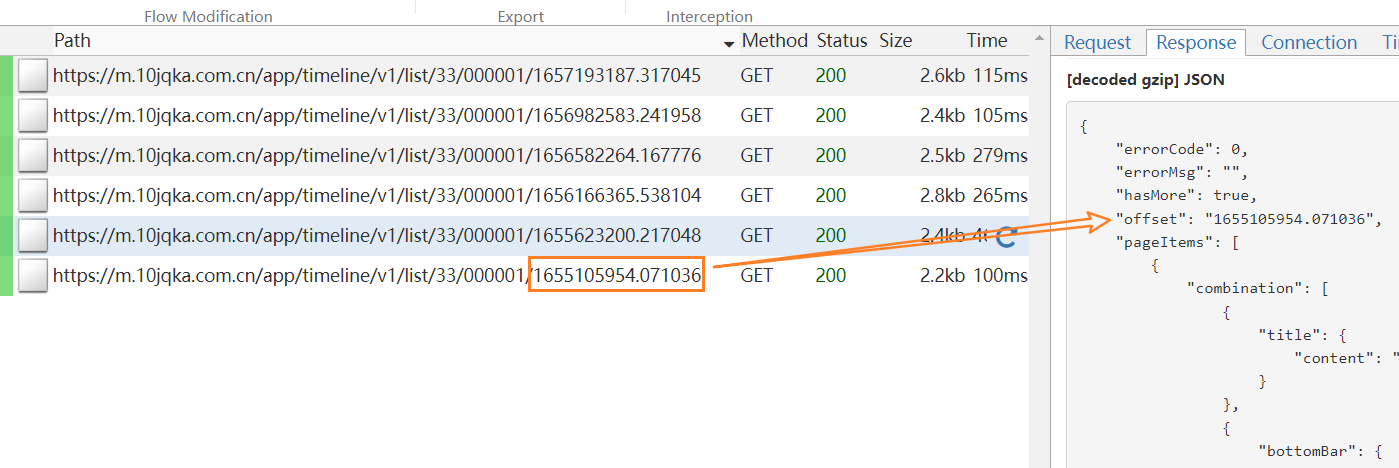

In [2]:
# 直接用递归算法好像要画好久时间跳出递归，所以爬完一个要 等很久很久，所以才用的 while True
# 这个代码写的很丑，呜呜呜

import requests
import csv
import os
import re
import pandas as pd
import numpy as np
import time
import fake_useragent


# def save_data(one_data, code, name):
#     # 存文件
#     road = re.sub(r'[\\:*?"<>|]', " ", r"./同花顺APP新闻数据/%s-%s" % (code, name))

#     if not os.path.exists(road):
#         os.mkdir(road)
#     file = open(r"%s/%s.txt" % (road, str(time.time())), mode="w", encoding="utf-8")
#     file.write(one_data)

#     # 提取数据
#     data_list = re.findall(
#         r'"info":.*?"jumpUrl":"(.*?)",".*?"title":\{"content":"(.*?)"}},.*?"recommend":"(.*?)",.*?"source":"(.*?)","time":(.*?),"clicks":(.*?)}',
#         one_data,
#         re.S)
#     data_list_save = [[code, name] + list(i) for i in data_list]
#     dataWriter.writerows(data_list_save)


def get_data_url(code, offset, name):
    url_api = f"https://m.10jqka.com.cn/app/timeline/v1/list/33/{code}/{offset}"
    resp = requests.get(url_api, headers=headers)
    resp_text = resp.text
    print(resp_text)
    offset_list = re.findall(r'"offset":"(\d+\.\d+)"', resp_text, re.S)
    try:
        hasMore = re.search(r'"hasMore":(.*?),"', resp_text, re.S).group(1)
    except:
        print(url_api)
        hasMore = True
    return offset_list, hasMore


ua = fake_useragent.UserAgent()
headers = {
    "user-agent": ua.random,
    "Host": "m.10jqka.com.cn",
    "Connection": "Keep-Alive",
    "Accept-Encoding": "gzip",
}



for one_code, one_name in zip(["00001"], ["平安银行"]):  # 直接拿 生产环境 的代码改过来的，所以这里很怪
    url = f"https://m.10jqka.com.cn/app/timeline/v1/list/33/{one_code}/first"
    resp = requests.get(url, headers=headers)
    resp_text = resp.text
    # todo: 因为：{"errorCode":0,"errorMsg":"","hasMore":false,"pageItems":[{"info":{"itemId":"1_640405988","type":1,"
    try:
        offset = re.findall(r'"offset":"(\d+\.\d+)"', resp_text, re.S)[0]
    except:
        offset = "first"
    while True:
        off_list, check = get_data_url(code=one_code, offset=offset, name=one_name)
        if check == "false":
            break
        else:
            offset = off_list[0]

{"errorCode":0,"errorMsg":"","hasMore":false,"pageItems":[{"info":{"itemId":"1_640803855","type":1,"jumpUrl":"https://news.10jqka.com.cn/m640803855/","webrsid":"seq_640803855"},"combination":[{"title":{"content":"8月2日至8月4日，上海相关区域将开展“3天2检”"}},{"bottomBar":{"recommend":"置顶","recommendType":2,"source":"同花顺7x24快讯","time":1659263938000,"clicks":31902}}]},{"info":{"itemId":"1_640803687","type":1,"jumpUrl":"https://news.10jqka.com.cn/m640803687/","webrsid":"seq_640803687"},"combination":[{"title":{"content":"监管出手 “迷你基金”最新要求来了"}},{"bottomBar":{"recommend":"置顶","recommendType":2,"source":"同花顺7x24快讯","time":1659259856000,"clicks":14480}}]},{"info":{"itemId":"1_640803867","type":1,"jumpUrl":"https://news.10jqka.com.cn/m640803867/","webrsid":"seq_640803867"},"combination":[{"title":{"content":"2连板宝馨科技：新能源高端智能制造项目近期完成土地摘牌"}},{"bottomBar":{"recommend":"","recommendType":0,"source":"同花顺7x24快讯","time":1659264759000,"clicks":26064}}]},{"info":{"itemId":"1_640803669","type":1,"jumpUrl":"https://news.10j